<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Amazon Delivery EDA</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f5f5f5;
        }
        .header {
            background-color: #232f3e;
            padding: 10px 20px;
            color: white;
            text-align: center;
        }
        .title {
            font-size: 36px;
            margin: 20px 0;
            color: #ff9900;
        }
        .subtitle {
            font-size: 20px;
            margin-bottom: 20px;
            color: #555;
        }
        .content {
            padding: 20px;
            text-align: center;
        }
        .toc {
            text-align: left;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: white;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            border-radius: 8px;
        }
        .toc-title {
            font-size: 24px;
            color: #232f3e;
            margin-bottom: 10px;
        }
        .toc ul {
            list-style-type: none;
            padding: 0;
        }
        .toc ul li {
            margin: 5px 0;
        }
        .toc ul li a {
            text-decoration: none;
            font-size: 16px;
            color: #232f3e;
        }
        .toc ul li a:hover {
            color: #ff9900;
        }
        .toc ul ul {
            margin-left: 20px;
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Amazon Delivery Insights</h1>
    </div>
    <div class="content">
        <div class="title">Exploratory Data Analysis (EDA)</div>
        <div class="subtitle">Unveiling Trends and Patterns in Delivery Data</div>
        <div class="toc">
            <div class="toc-title">Table of Contents</div>
            <ul>
                <li><a href="#introduction">1. Introduction</a></li>
                <li>
                    <a href="#data-understanding">2. Data Understanding</a>
                    <ul>
                        <li><a href="#loading-the-data">Loading the Data</a></li>
                        <li><a href="#exploratory-data-analysis">Exploratory Data Analysis</a></li>
                    </ul>
                </li>
                <li>
                    <a href="#data-preparation">3. Data Preparation</a>
                    <ul>
                        <li><a href="#handling-missing-values">Handling Missing Values</a></li>
                        <li><a href="#removing-duplicates">Removing Duplicates</a></li>
                        <li><a href="#feature-engineering">Feature Engineering</a></li>
                    </ul>
                </li>
                <li>
                    <a href="#data-analysis">4. Data Analysis</a>
                    <ul>
                        <li><a href="#descriptive-statistics">Descriptive Statistics</a></li>
                        <li><a href="#correlation-analysis">Correlation Analysis</a></li>
                        <li><a href="#latitude-longitude-analysis">Latitude and Longitude Analysis</a></li>
                        <li><a href="#delivery-time-analysis">Delivery Time Analysis</a></li>
                        <li><a href="#impact-of-weather-and-traffic">Impact of Weather and Traffic</a></li>
                    </ul>
                </li>
                <li><a href="#conclusions-and-recommendations">6. Conclusions and Recommendations</a></li>
            </ul>
        </div>
    </div>
</body>
</html>


# Introduction

Welcome to the Amazon Delivery Insights project. This project aims to perform an Exploratory Data Analysis (EDA) on Amazon's last-mile delivery dataset to uncover insights and patterns that can help improve delivery efficiency and overall customer experience.

Last-mile delivery is the final step of the delivery process where a package is transported from a transportation hub to its final destination. This stage is crucial as it directly impacts customer satisfaction and operational costs. By analyzing data from over 43,632 deliveries, we aim to identify key factors influencing delivery times, agent performance, and the impact of external factors such as weather and traffic conditions.

The insights gained from this analysis can be used to optimize delivery routes, enhance agent performance, and ultimately provide a better experience for Amazon's customers.


# Data Understanding

In this section, we will explore the Amazon Delivery Dataset to gain a better understanding of its structure, contents, and the relationships between different variables. This understanding is crucial for performing meaningful analyses and deriving actionable insights.


## Loading the Data

First, we will load the dataset and take a preliminary look at its structure and contents.

In [1]:
# Let's look at the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

# Load the dataset
delivery_data = pd.read_csv('/media/fares/E0A4559DA45576CE/Ai-Files/Courses/ML&PYTHON/amazon_delivery/dataset/amazon_delivery.csv')

# Make dataset a dataframe
delivery_data = pd.DataFrame(delivery_data)

In [2]:
# Show the dataset
delivery_data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


## Exploratory Data Analysis
### Overview of the Data

Let's start by examining the basic information about the dataset, such as the number of rows and columns, data types, and summary statistics.

In [3]:
# Display basic information about the dataset
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


#### Dataset Information

The dataset contains 43,739 entries with 16 columns. Here's a breakdown of the columns and their respective data types:

| Column           | Non-Null Count | Dtype   |
|------------------|----------------|---------|
| Order_ID         | 43739          | object  |
| Agent_Age        | 43739          | int64   |
| Agent_Rating     | 43685          | float64 |
| Store_Latitude   | 43739          | float64 |
| Store_Longitude  | 43739          | float64 |
| Drop_Latitude    | 43739          | float64 |
| Drop_Longitude   | 43739          | float64 |
| Order_Date       | 43739          | object  |
| Order_Time       | 43739          | object  |
| Pickup_Time      | 43739          | object  |
| Weather          | 43648          | object  |
| Traffic          | 43739          | object  |
| Vehicle          | 43739          | object  |
| Area             | 43739          | object  |
| Delivery_Time    | 43739          | int64   |
| Category         | 43739          | object  |

##### Observations:
- **Agent_Rating**: There are 54 missing values.
- **Weather**: There are 91 missing values.


In [4]:
# Display summary statistics
delivery_data.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


#### Summary Statistics

| Statistic      | Agent_Age   | Agent_Rating | Store_Latitude | Store_Longitude | Drop_Latitude | Drop_Longitude | Delivery_Time |
|----------------|-------------|--------------|----------------|-----------------|---------------|----------------|---------------|
| count          | 43739       | 43685        | 43739          | 43739           | 43739         | 43739          | 43739         |
| mean           | 29.57       | 4.63         | 17.21          | 70.66           | 17.46         | 70.82          | 124.91        |
| std            | 5.82        | 0.33         | 7.76           | 21.48           | 7.34          | 21.15          | 51.92         |
| min            | 15.00       | 1.00         | -30.90         | -88.37          | 0.01          | 0.01           | 10.00         |
| 25%            | 25.00       | 4.50         | 12.93          | 73.17           | 12.99         | 73.28          | 90.00         |
| 50%            | 30.00       | 4.70         | 18.55          | 75.90           | 18.63         | 76.00          | 125.00        |
| 75%            | 35.00       | 4.90         | 22.73          | 78.05           | 22.79         | 78.10          | 160.00        |
| max            | 50.00       | 6.00         | 30.91          | 88.43           | 31.05         | 88.56          | 270.00        |


that there are equally fewer young and older agents compared to those in their mid-ages.

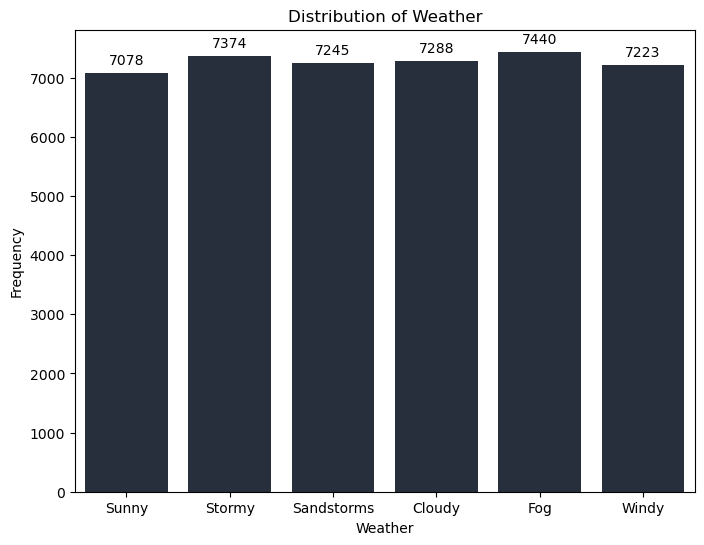

In [5]:
# Count plot for the 'Weather'
plt.figure(figsize=(8, 6))
ax= sns.countplot(x='Weather', data=delivery_data, color='#232f3e')
# Add counts above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10, color='black')
plt.title('Distribution of Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.show()

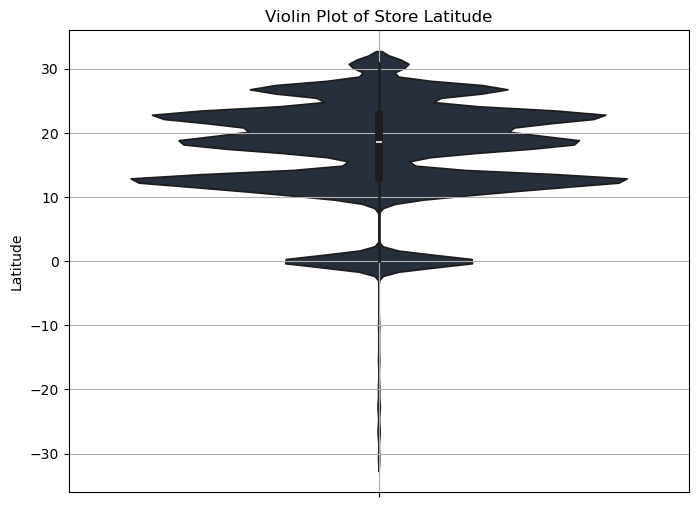

In [6]:
# Violin plot for 'Store_Latitude'
plt.figure(figsize=(8, 6))
sns.violinplot(y=delivery_data['Store_Latitude'], color='#232f3e')
plt.title('Violin Plot of Store Latitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



#### Symmetrical Shape: 
The plot appears symmetrical, with bulges at specific points. This indicates where data points are more concentrated.

#### Latitude Range: 
The vertical axis is labeled “Latitude” and ranges from -30 to 30. This represents the latitude values for the stores.

#### Density and Spread: 
The violin plot shows the probability density of the data at different latitudes. The wider parts of the violin indicate higher density, while the narrower parts represent lower density.


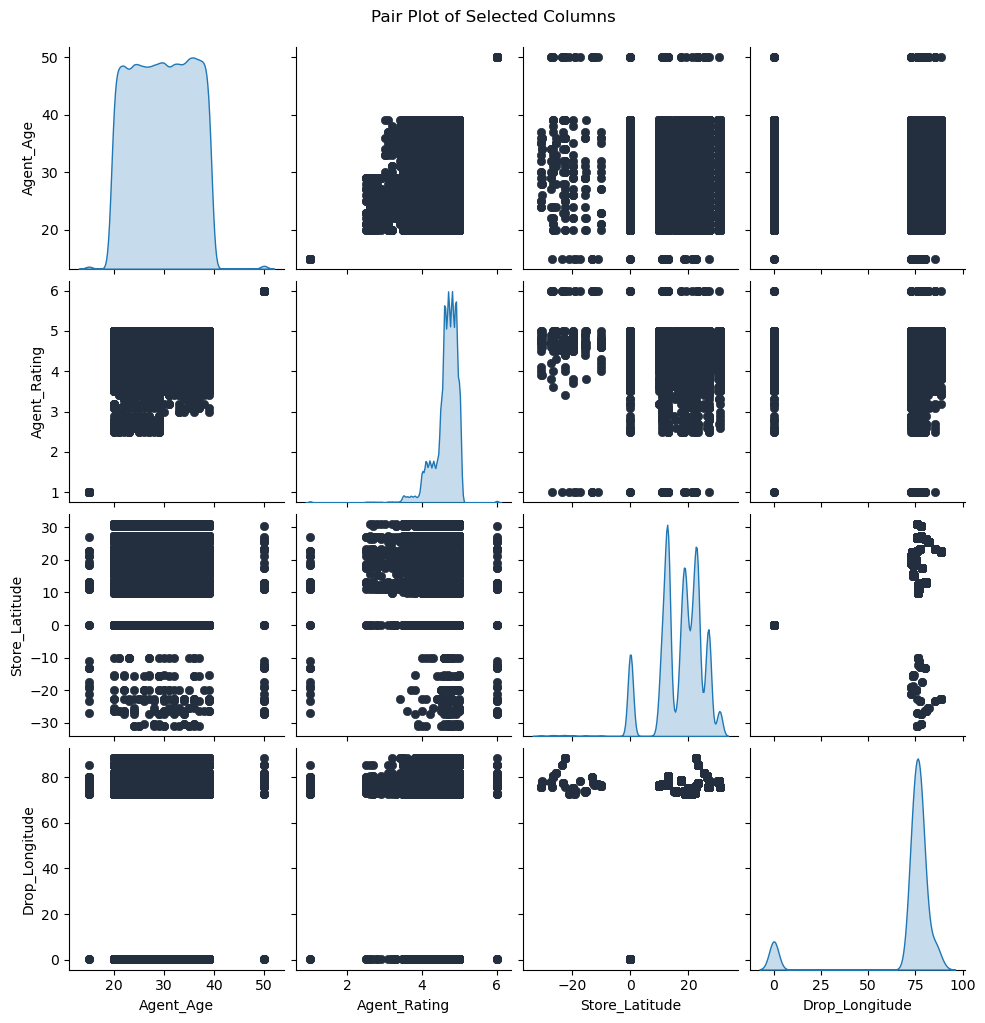

In [7]:
# Pair plot for selected columns
color = '#232f3e'
pair_plot = sns.pairplot(delivery_data[['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Drop_Longitude']], diag_kind='kde')
for ax in pair_plot.axes.flatten():
    if ax:
        for artist in ax.lines + ax.collections:
            artist.set_color(color)
        for artist in ax.patches:
            artist.set_edgecolor(color)
            artist.set_facecolor(color)
    if hasattr(ax, 'collections'):
        for artist in ax.collections:
            artist.set_edgecolor(color)

plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()



#### Agent Rating vs. Agent Age:
There seems to be a positive correlation between agent rating and age. As agent age increases, their rating tends to be higher.
The scatter plot shows a diagonal line, suggesting a linear relationship.

#### Agent Rating vs. Store Latitude:
No clear trend is visible in the scatter plot. The density of points varies across different latitude values.
The histograms for agent rating and store latitude show their individual distributions.

#### Agent Rating vs. Drop Longitude:
Similar to the latitude, there is no strong correlation between agent rating and drop longitude.
The histograms provide insights into the distribution of these variables.

#### Store Latitude vs. Agent Age:
The scatter plot shows a symmetric distribution, with higher density around specific latitude values.
The histograms reveal the distribution of both latitude and age.


## Data Preparation

### Handling Missing Values

Missing data points are addressed through imputation or removal based on their impact on analysis outcomes and data integrity.

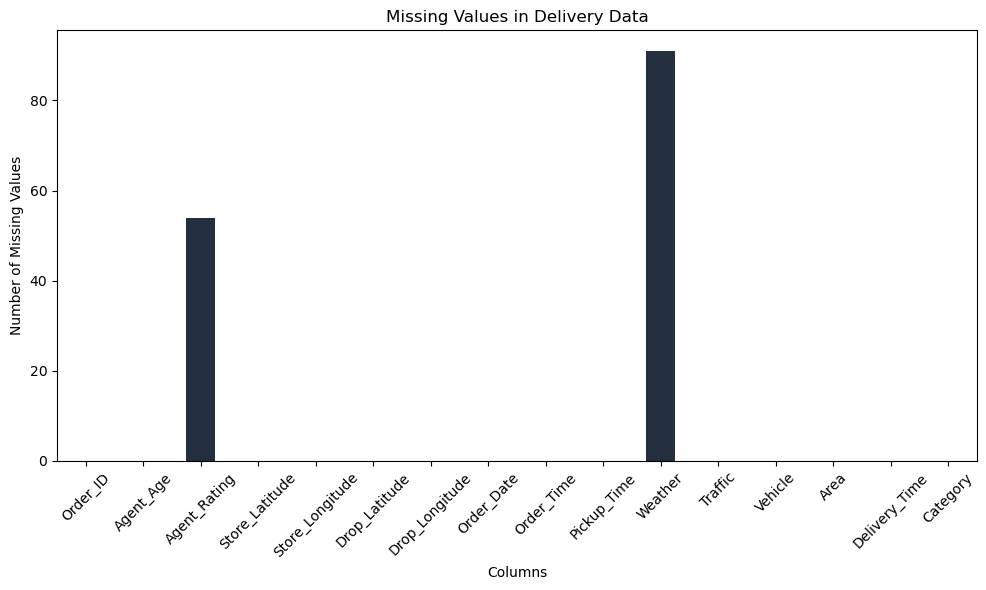

In [8]:
# Handling missing values
delivery_data.isna().sum()

# Plotting
plt.figure(figsize=(10, 6))
delivery_data.isna().sum().plot(kind='bar', color="#232f3e")
plt.title('Missing Values in Delivery Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Imputation with Mean/Median:

Replace missing values with the mean or median of the column. This is useful for numerical columns like `Agent_Rating`.

In [9]:
# Handling missing values with Mean/Median
mean_agent_rating = delivery_data['Agent_Rating'].mean()
delivery_data['Agent_Rating'] = delivery_data['Agent_Rating'].fillna(mean_agent_rating)

#### Imputation with Mode:

Replace missing values with the mode (most frequent value) of the column. This is suitable for categorical or ordinal data like `Weather`.

In [10]:
# Handling missing values with mode
mode_weather = delivery_data['Weather'].mode()[0]
delivery_data['Weather'].fillna(mode_weather, inplace=True)

In [11]:
# Show dataset after handling missing values
delivery_data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [12]:
# Check dataframe NULL values
delivery_data.isna().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

### Removing Duplicates

Remove duplicate rows from the dataset to maintain data integrity and accuracy.

In [13]:
# Check the number of duplicates before removing
delivery_data.duplicated().sum()

0

stating that no duplicates were found DataFrame.


### Feature Engineering


#### lower cased

- ensure all feature names and documentation are in lowercase for consistency.

In [14]:
# Convert all column names to lowercase
delivery_data.columns = delivery_data.columns.str.lower()

# List of all categorical columns in the dataframe
categorical_columns = delivery_data.select_dtypes(include=['object']).columns

# Convert all values to lowercase in categorical columns
for col in categorical_columns:
    delivery_data[col] = delivery_data[col].str.lower()

# Check the first few rows
print(delivery_data.head())

        order_id  agent_age  agent_rating  store_latitude  store_longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   drop_latitude  drop_longitude  order_date order_time pickup_time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      weather  traffic      vehicle            area  delivery_time  \
0       sunny    high   motorcycle

#### Date and Time Features
- Extracted `year`, `month`, `day`, and `weekday` from `Order_Date`.

- Derived `Order_Hour` and `Pickup_Hour` from `Order_Time` and `Pickup_Time`.

In [15]:
# extracting year, month, day  and weekday from `Order_Date`
delivery_data['order_date'] = pd.to_datetime(delivery_data['order_date'])
delivery_data['year'] = delivery_data['order_date'].dt.year
delivery_data['month'] = delivery_data['order_date'].dt.month
delivery_data['day'] = delivery_data['order_date'].dt.day
delivery_data['weekday'] = delivery_data['order_date'].dt.weekday

# extracting order_hour and pickup_hour from `Order_Time` and `Pickup_Time`
delivery_data['order_time'] = pd.to_datetime(delivery_data['order_time'], format='%H:%M:%S', errors='coerce')
delivery_data['pickup_time'] = pd.to_datetime(delivery_data['pickup_time'], format='%H:%M:%S', errors='coerce')
delivery_data['order_hour'] = delivery_data['order_time'].dt.hour
delivery_data['pickup_hour'] = delivery_data['pickup_time'].dt.hour

# drop old columns
delivery_data.drop(['order_date', 'order_time', 'pickup_time'], axis=1, inplace=True)

# check the first few rows
delivery_data.head()

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,weather,traffic,vehicle,area,delivery_time,category,year,month,day,weekday,order_hour,pickup_hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,sunny,high,motorcycle,urban,120,clothing,2022,3,19,5,11.0,11
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,stormy,jam,scooter,metropolitian,165,electronics,2022,3,25,4,19.0,19
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,sandstorms,low,motorcycle,urban,130,sports,2022,3,19,5,8.0,8
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,sunny,medium,motorcycle,metropolitian,105,cosmetics,2022,4,5,1,18.0,18
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,cloudy,high,scooter,metropolitian,150,toys,2022,3,26,5,13.0,13


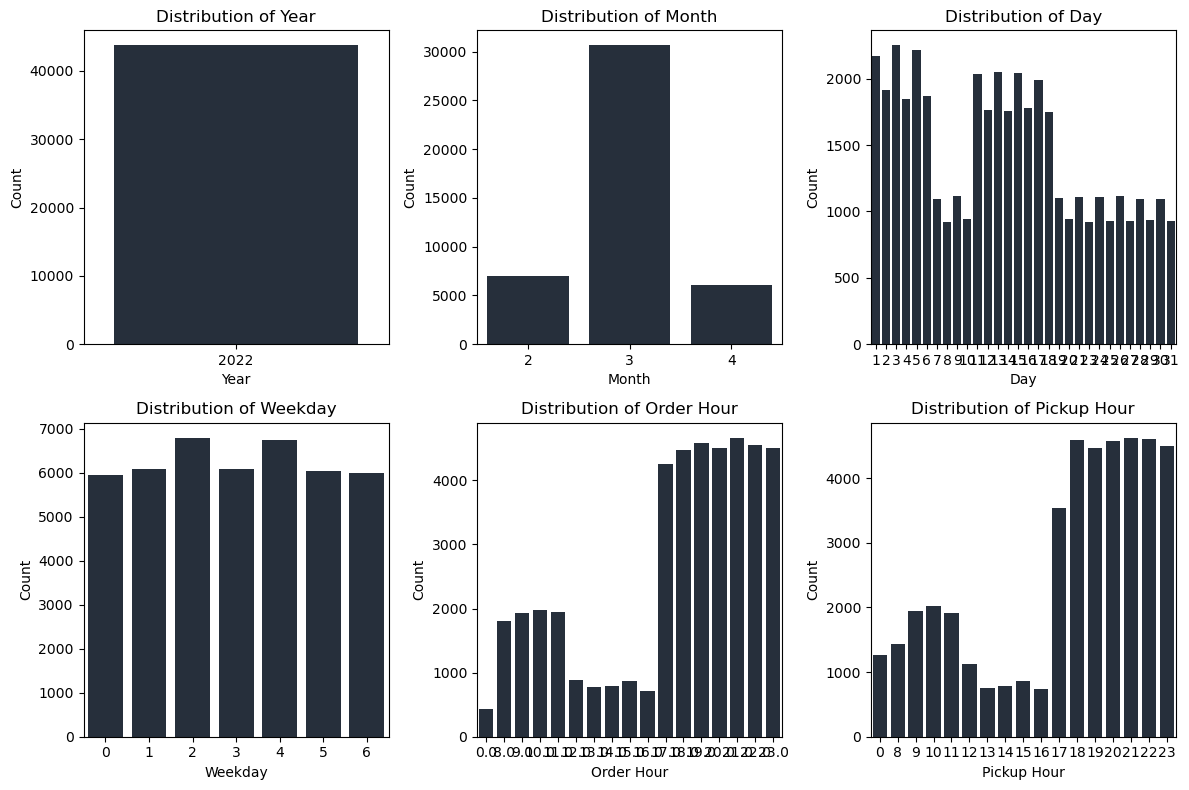

In [16]:
# Set the custom color
color = '#232f3e'

# Plotting
plt.figure(figsize=(12, 8))

# Distribution of 'year'
plt.subplot(2, 3, 1)
sns.countplot(x='year', data=delivery_data, color=color)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Distribution of 'month'
plt.subplot(2, 3, 2)
sns.countplot(x='month', data=delivery_data, color=color)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Distribution of 'day'
plt.subplot(2, 3, 3)
sns.countplot(x='day', data=delivery_data, color=color)
plt.title('Distribution of Day')
plt.xlabel('Day')
plt.ylabel('Count')

# Distribution of 'weekday'
plt.subplot(2, 3, 4)
sns.countplot(x='weekday', data=delivery_data, color=color)
plt.title('Distribution of Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')

# Distribution of 'order_hour'
plt.subplot(2, 3, 5)
sns.countplot(x='order_hour', data=delivery_data, color=color)
plt.title('Distribution of Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Count')

# Distribution of 'pickup_hour'
plt.subplot(2, 3, 6)
sns.countplot(x='pickup_hour', data=delivery_data, color=color)
plt.title('Distribution of Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Geospatial Features
- Calculated `Distance_km` between `Store_Location` and `Drop_Location` using geopy library.

In [17]:
# calculate the distance between `Store_Location` and `Drop_Location
from geopy.distance import geodesic

def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).km

delivery_data['distance_km'] = delivery_data.apply(lambda row: calculate_distance(row['store_latitude'], row['store_longitude'], row['drop_latitude'], row['drop_longitude']), axis=1)

In [18]:
# show dataframe
delivery_data.head()

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,weather,traffic,vehicle,area,delivery_time,category,year,month,day,weekday,order_hour,pickup_hour,distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,sunny,high,motorcycle,urban,120,clothing,2022,3,19,5,11.0,11,3.020737
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,stormy,jam,scooter,metropolitian,165,electronics,2022,3,25,4,19.0,19,20.143737
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,sandstorms,low,motorcycle,urban,130,sports,2022,3,19,5,8.0,8,1.549693
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,sunny,medium,motorcycle,metropolitian,105,cosmetics,2022,4,5,1,18.0,18,7.774497
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,cloudy,high,scooter,metropolitian,150,toys,2022,3,26,5,13.0,13,6.197898


#### Categorical Features
- Applied one-hot encoding to `Weather`, `Traffic`, `Vehicle`, and `Area` columns.

In [19]:
# # applied to `Weather` and `Traffic and `Vehicle` and `Area` columns one hot encoding
# categorical_columns = ['weather', 'traffic', 'vehicle', 'area']
# delivery_data = pd.get_dummies(delivery_data, columns=categorical_columns)

## Data Analysis

### Descriptive Statistics

In [20]:
# Basic Descriptive Statistics
numerical_stats = delivery_data.describe().T
numerical_stats

,count,mean,std,min,25%,50%,75%,max
agent_age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000
agent_rating,43739.0,4.633780,0.334510,1.000000,4.500000,4.700000,4.900000,6.000000
store_latitude,43739.0,17.210960,7.764225,-30.902872,12.933298,18.551440,22.732225,30.914057
store_longitude,43739.0,70.661177,21.475005,-88.366217,73.170283,75.898497,78.045359,88.433452
drop_latitude,43739.0,17.459031,7.342950,0.010000,12.985996,18.633626,22.785049,31.054057
drop_longitude,43739.0,70.821842,21.153148,0.010000,73.280000,76.002574,78.104095,88.563452
delivery_time,43739.0,124.905645,51.915451,10.000000,90.000000,125.000000,160.000000,270.000000
year,43739.0,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
month,43739.0,2.979812,0.546506,2.000000,3.000000,3.000000,3.000000,4.000000
day,43739.0,13.812341,8.706032,1.000000,6.000000,13.000000,20.000000,31.000000


In [21]:
# Range Calculation
numerical_stats['range'] = numerical_stats['max'] - numerical_stats['min']
numerical_stats

,count,mean,std,min,25%,50%,75%,max,range
agent_age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000,35.000000
agent_rating,43739.0,4.633780,0.334510,1.000000,4.500000,4.700000,4.900000,6.000000,5.000000
store_latitude,43739.0,17.210960,7.764225,-30.902872,12.933298,18.551440,22.732225,30.914057,61.816929
store_longitude,43739.0,70.661177,21.475005,-88.366217,73.170283,75.898497,78.045359,88.433452,176.799669
drop_latitude,43739.0,17.459031,7.342950,0.010000,12.985996,18.633626,22.785049,31.054057,31.044057
drop_longitude,43739.0,70.821842,21.153148,0.010000,73.280000,76.002574,78.104095,88.563452,88.553452
delivery_time,43739.0,124.905645,51.915451,10.000000,90.000000,125.000000,160.000000,270.000000,260.000000
year,43739.0,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
month,43739.0,2.979812,0.546506,2.000000,3.000000,3.000000,3.000000,4.000000,2.000000
day,43739.0,13.812341,8.706032,1.000000,6.000000,13.000000,20.000000,31.000000,30.000000


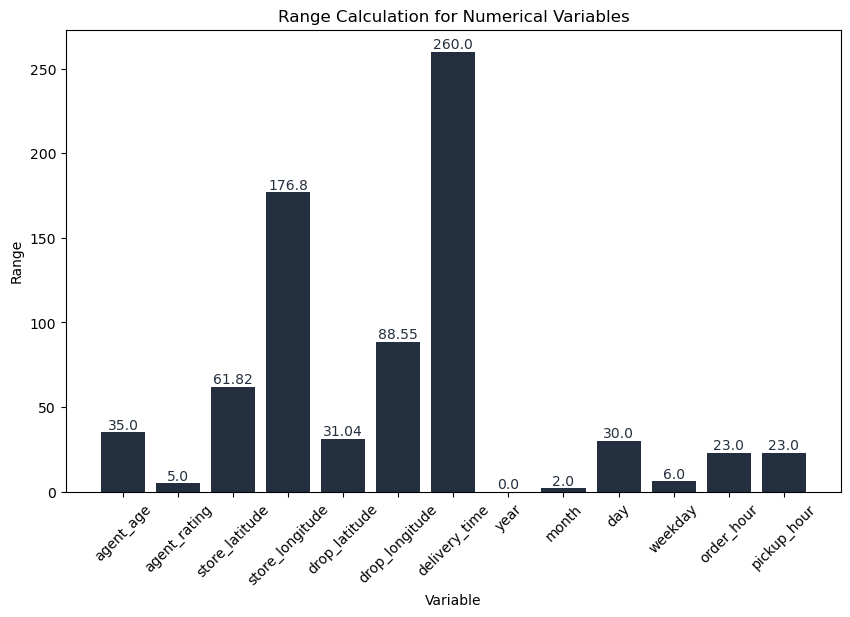

In [22]:
# Exclude 'distance_km' from numerical_stats
numerical_stats_without_distance = numerical_stats.drop('distance_km')

# Plotting range for each numerical variable excluding 'distance_km'
plt.figure(figsize=(10, 6))
bars = plt.bar(numerical_stats_without_distance.index, numerical_stats_without_distance['range'], color='#232f3e')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', color='#232f3e', fontsize=10)

plt.title('Range Calculation for Numerical Variables')
plt.xlabel('Variable')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Summary for Categorical Columns
categorical_summary = {col: delivery_data[col].value_counts() for col in delivery_data.select_dtypes(include=['object']).columns}
print("\nCategorical Summary:")
for col, summary in categorical_summary.items():
    print(f"\n{col.capitalize()}:\n", summary)



Categorical Summary:

Order_id:
 order_id
ialx566343618    1
qzgi619412151    1
weiw108744994    1
pfvr771559834    1
odmp530175660    1
                ..
yjwk928768239    1
mori995207669    1
bxnf323229063    1
knka353994987    1
nsyz997960170    1
Name: count, Length: 43739, dtype: int64

Weather:
 weather
fog           7531
stormy        7374
cloudy        7288
sandstorms    7245
windy         7223
sunny         7078
Name: count, dtype: int64

Traffic:
 traffic
low        14999
jam        13725
medium     10628
high        4296
nan           91
Name: count, dtype: int64

Vehicle:
 vehicle
motorcycle     25527
scooter        14639
van             3558
bicycle           15
Name: count, dtype: int64

Area:
 area
metropolitian     32698
urban              9751
other              1138
semi-urban          152
Name: count, dtype: int64

Category:
 category
electronics     2849
books           2824
jewelry         2802
toys            2781
skincare        2772
snacks          2770
outdoor

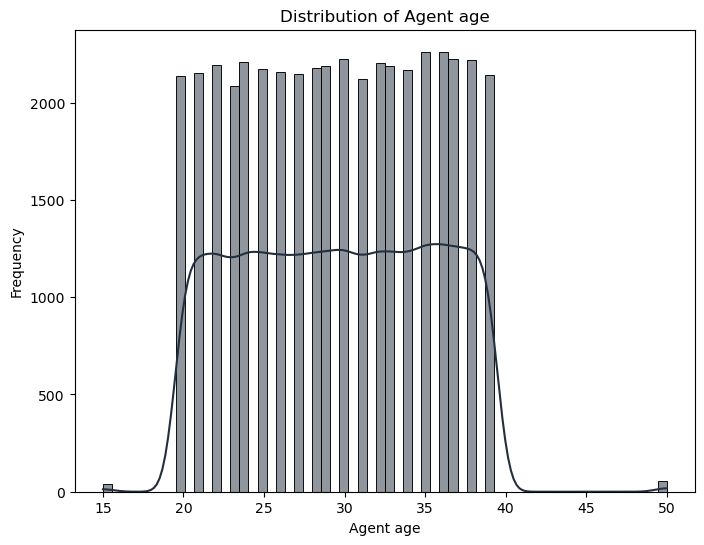

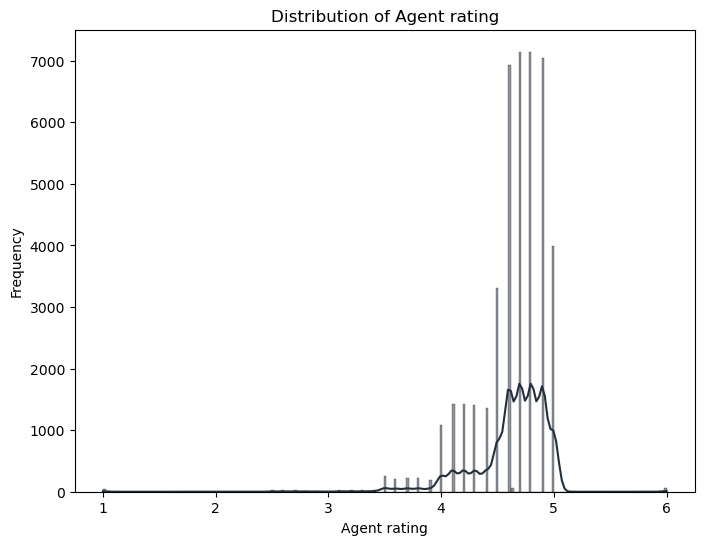

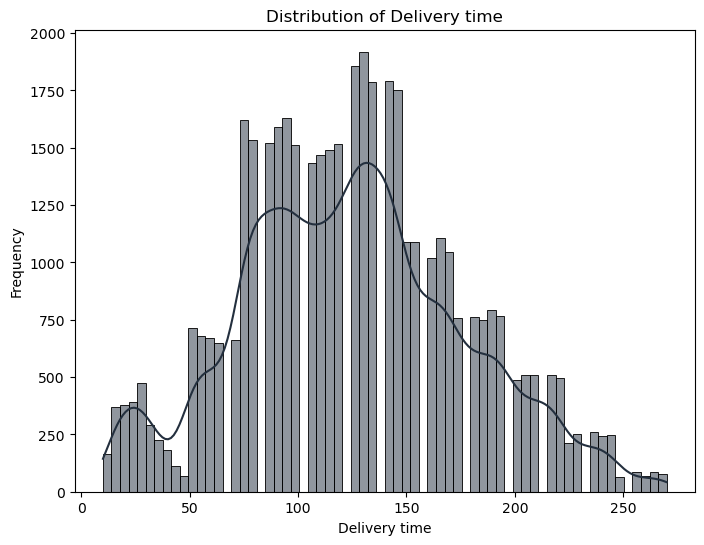

In [24]:
numerical_columns = ['agent_age', 'agent_rating', 'delivery_time']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(delivery_data[col], kde=True, color='#232f3e')
    plt.title(f'Distribution of {col.replace("_", " ").capitalize()}')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Frequency')
    plt.show()

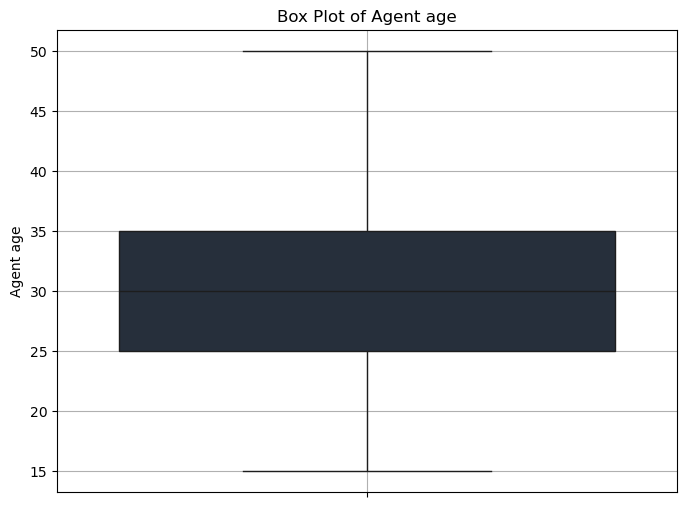

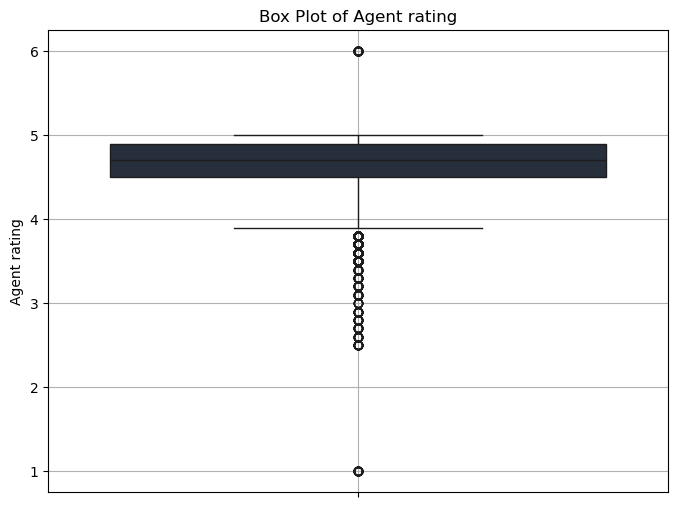

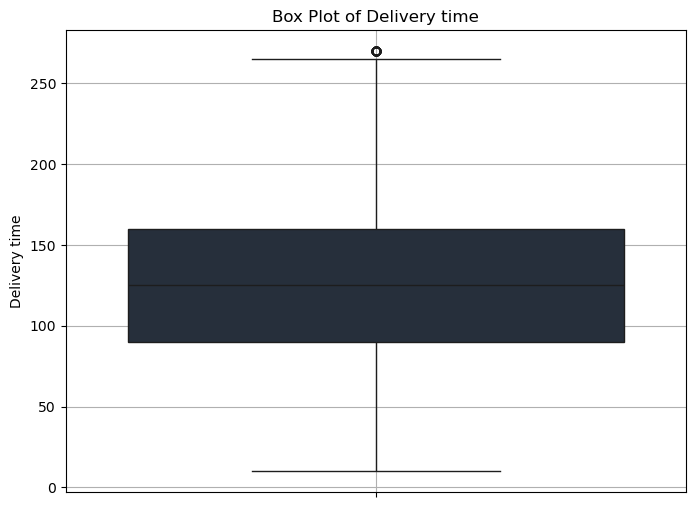

In [25]:
# Box plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=delivery_data[col], color='#232f3e')
    plt.title(f'Box Plot of {col.replace("_", " ").capitalize()}')
    plt.ylabel(col.replace("_", " ").capitalize())
    plt.grid(True)
    plt.show()

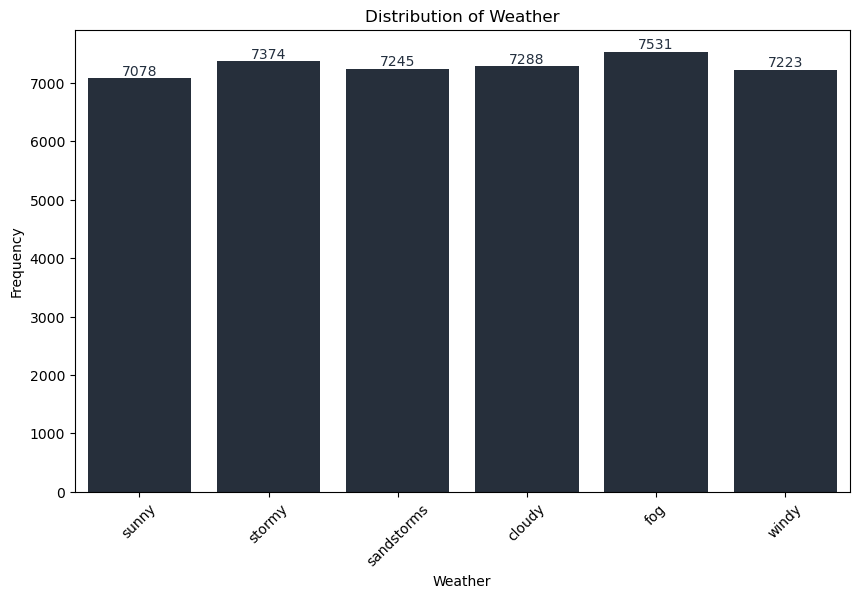

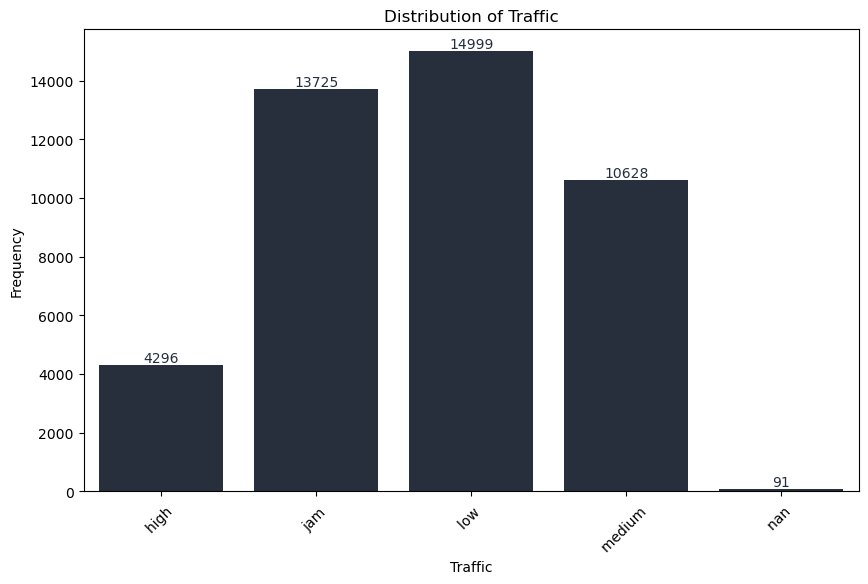

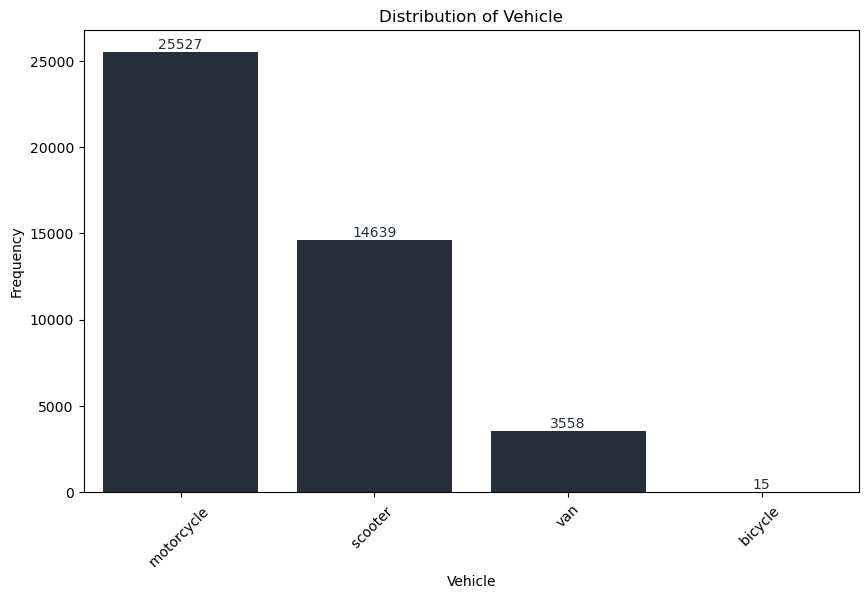

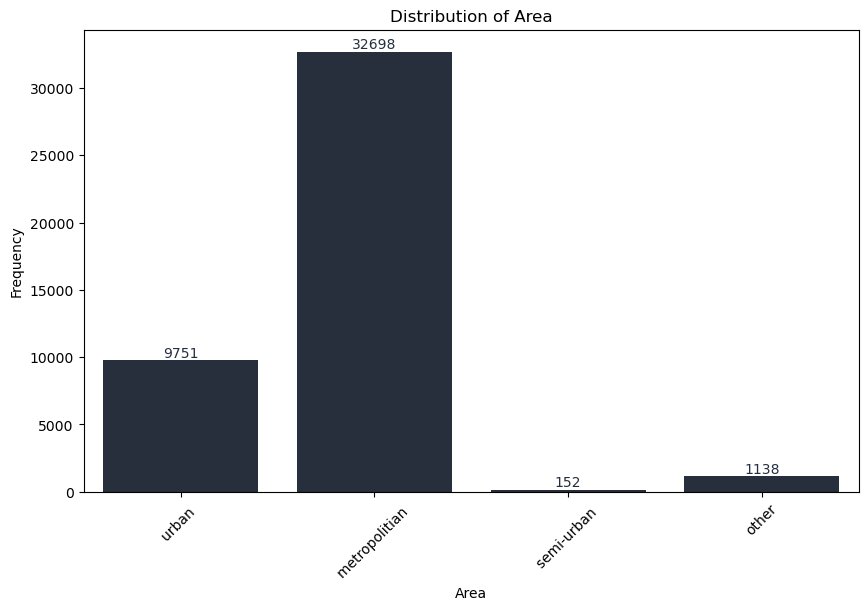

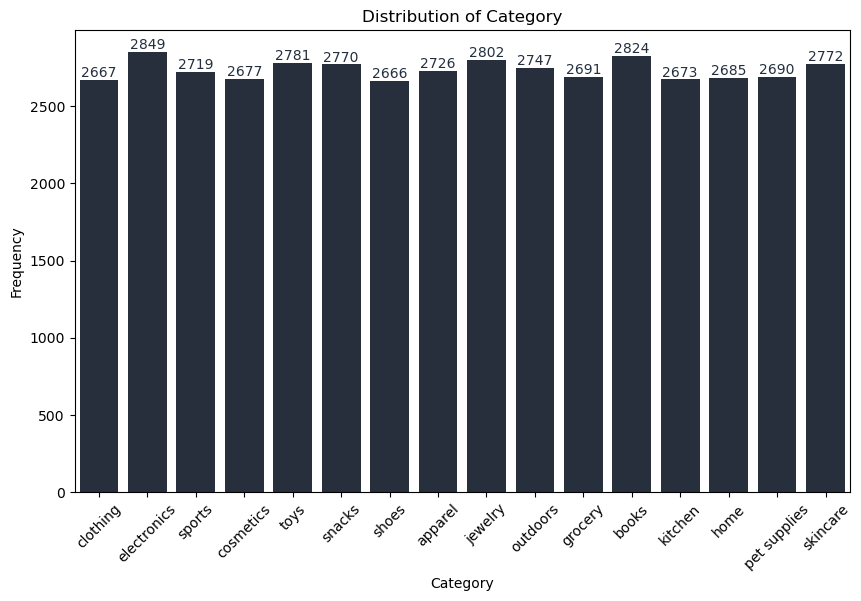

In [26]:
# Bar plots for categorical columns
categorical_columns = ['weather', 'traffic', 'vehicle', 'area', 'category']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=delivery_data, palette=['#232f3e'])
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    for bar in plt.gca().patches:
        plt.gca().annotate(format(bar.get_height(), '.0f'),
                           (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                           ha='center', va='center', xytext=(0, 5),
                           textcoords='offset points', color='#232f3e')
    
    plt.show()

### Correlation Analysis

In [27]:
# Select only numeric columns
numeric_cols = delivery_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Display correlation matrix
correlation_matrix

,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,delivery_time,year,month,day,weekday,order_hour,pickup_hour,distance_km
agent_age,1.000000,-0.067889,-0.004532,-0.009347,0.002489,-0.000495,0.254618,NaN,-0.007052,0.003153,0.008790,-0.000410,-0.001203,0.041076
agent_rating,-0.067889,1.000000,-0.007774,-0.014184,-0.010306,-0.013533,-0.289854,NaN,-0.008104,-0.006728,-0.007169,-0.061742,-0.049387,-0.001509
store_latitude,-0.004532,-0.007774,1.000000,0.655086,0.926618,0.643916,0.017009,NaN,-0.031506,-0.000408,-0.005103,0.005907,0.007910,-0.270255
store_longitude,-0.009347,-0.014184,0.655086,1.000000,0.679743,0.983280,0.011173,NaN,0.089135,-0.004550,-0.006435,-0.002014,0.000197,-0.128591
drop_latitude,0.002489,-0.010306,0.926618,0.679743,1.000000,0.690943,0.016928,NaN,-0.072970,0.001042,-0.001374,0.009333,0.011173,0.032238
drop_longitude,-0.000495,-0.013533,0.643916,0.983280,0.690943,1.000000,0.011523,NaN,0.089336,-0.004732,-0.005130,-0.001015,0.001185,0.021149
delivery_time,0.254618,-0.289854,0.017009,0.011173,0.016928,0.011523,1.000000,NaN,-0.010728,0.022785,0.006360,0.158796,0.173361,-0.001854
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.007052,-0.008104,-0.031506,0.089135,-0.072970,0.089336,-0.010728,NaN,1.000000,-0.325052,-0.011793,-0.006647,-0.005802,-0.063546
day,0.003153,-0.006728,-0.000408,-0.004550,0.001042,-0.004732,0.022785,NaN,-0.325052,1.000000,-0.045866,0.030588,0.029316,0.001494


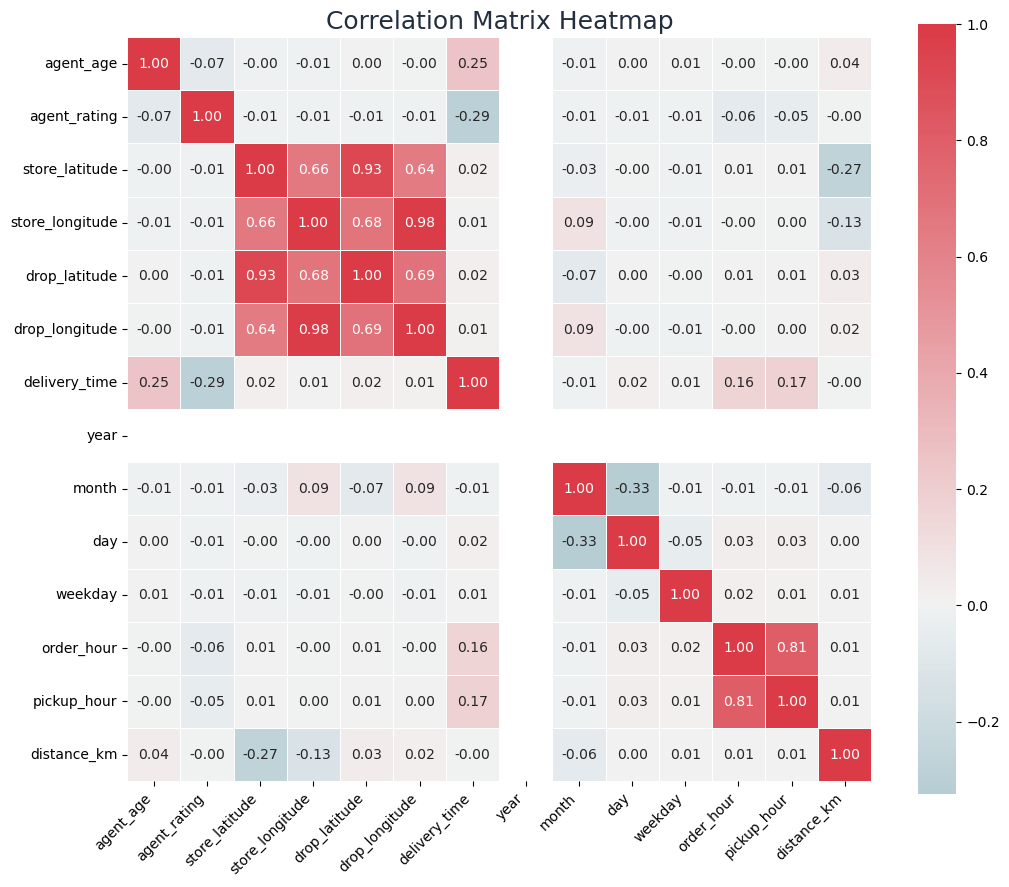

In [28]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size": 10},color='#232f3e')

# Title and display options
plt.title('Correlation Matrix Heatmap', fontsize=18, color='#232f3e')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

#### Significant Correlations

In [29]:
# Extract highly correlated pairs
high_correlation_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
significant_correlations = high_correlation_pairs[high_correlation_pairs > 0.5]

significant_correlations

agent_age        agent_age          1.000000
drop_longitude   store_longitude    0.983280
drop_latitude    store_latitude     0.926618
order_hour       pickup_hour        0.807443
drop_longitude   drop_latitude      0.690943
store_longitude  drop_latitude      0.679743
store_latitude   store_longitude    0.655086
drop_longitude   store_latitude     0.643916
dtype: float64

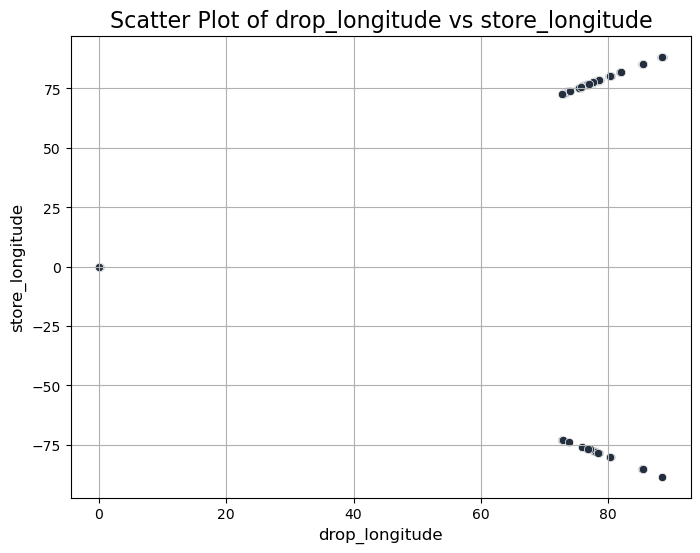

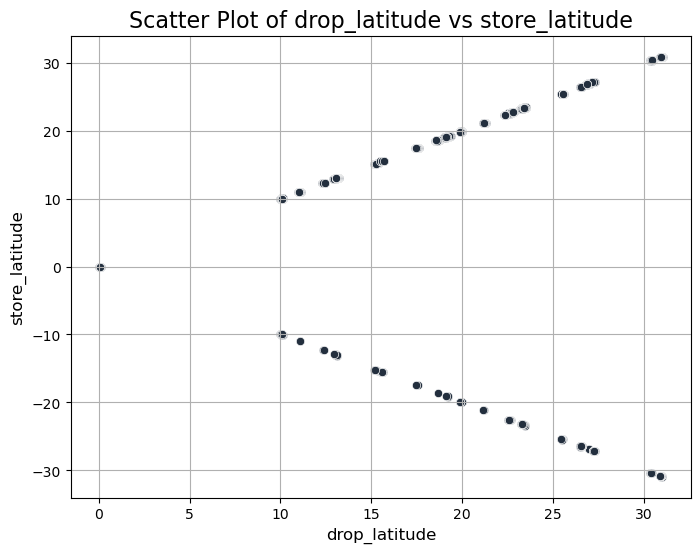

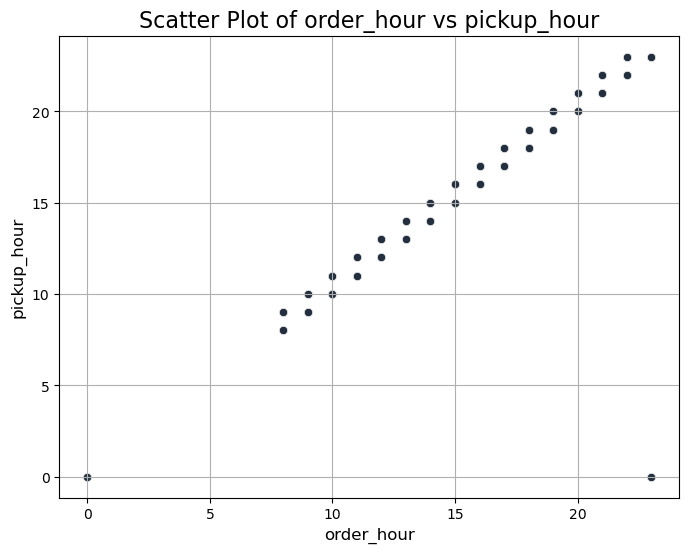

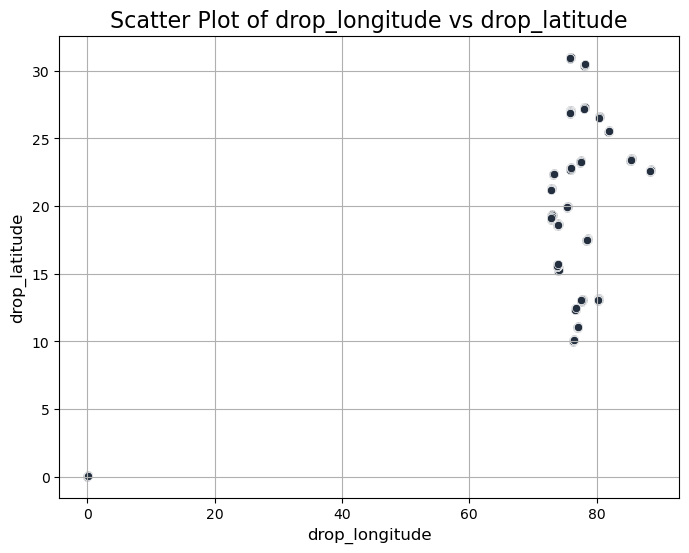

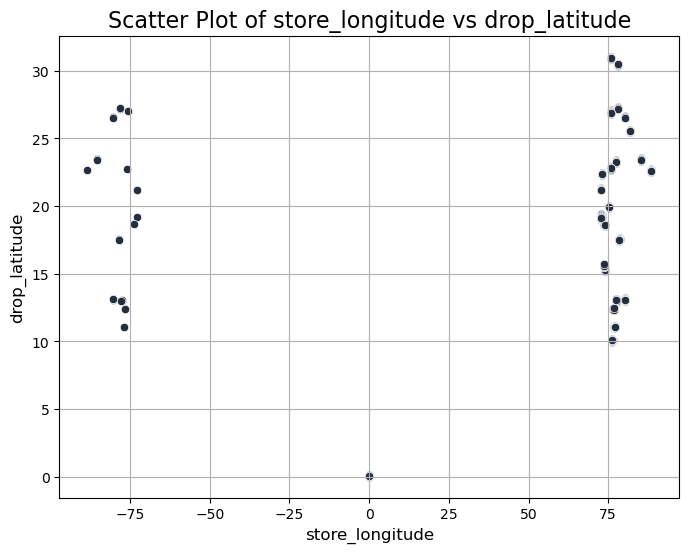

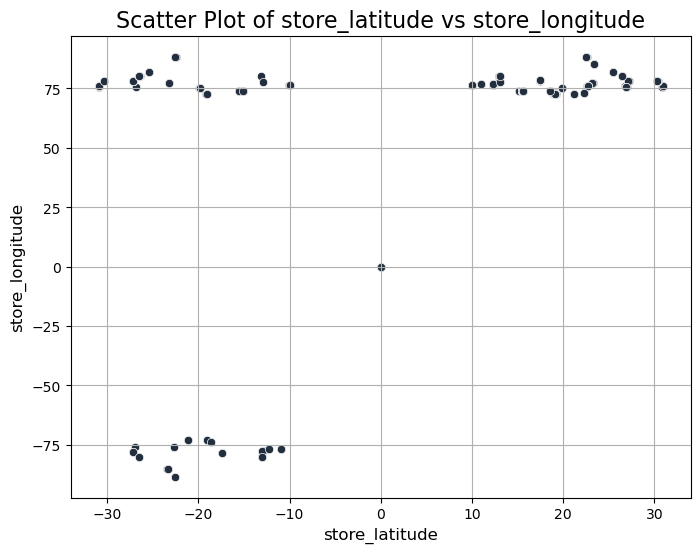

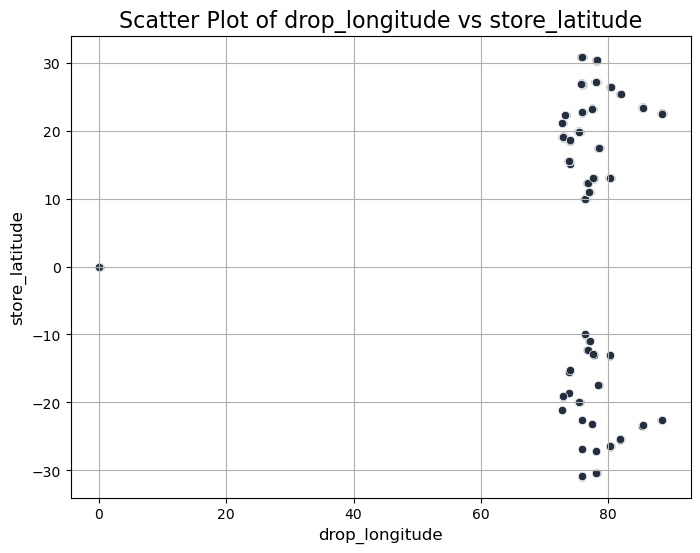

In [30]:
# List of top significant correlations
top_significant_correlations = significant_correlations[1:11].index.tolist()  # Exclude the first pair as it will be (1, 1)

# Scatter plots for the top significant correlations
for (var1, var2) in top_significant_correlations:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var1, y=var2, data=numeric_cols, color='#232f3e')
    plt.title(f'Scatter Plot of {var1} vs {var2}', fontsize=16)
    plt.xlabel(var1, fontsize=12)
    plt.ylabel(var2, fontsize=12)
    plt.grid(True)
    plt.show()

### Impact of Weather and Traffic

In [31]:
# Check the unique values in weather and traffic columns
print(delivery_data['weather'].unique())
print(delivery_data['traffic'].unique())

['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy']
['high ' 'jam ' 'low ' 'medium ' 'nan ']


In [33]:
# Descriptive statistics for delivery times by weather
weather_stats = delivery_data.groupby('weather')['delivery_time'].describe()
print(weather_stats)

# Descriptive statistics for delivery times by traffic
traffic_stats = delivery_data.groupby('traffic')['delivery_time'].describe()
print(traffic_stats)

             count        mean        std   min   25%    50%    75%    max
weather                                                                   
cloudy      7288.0  138.286773  55.466779  10.0  95.0  140.0  180.0  270.0
fog         7531.0  136.378701  57.101310  10.0  90.0  135.0  180.0  270.0
sandstorms  7245.0  123.238509  48.312012  10.0  90.0  125.0  150.0  270.0
stormy      7374.0  123.211825  47.801804  10.0  90.0  125.0  150.0  270.0
sunny       7078.0  103.664453  45.437248  10.0  75.0  100.0  125.0  270.0
windy       7223.0  123.658037  48.522905  10.0  90.0  125.0  150.0  270.0
           count        mean        std   min    25%    50%    75%    max
traffic                                                                  
high      4296.0  129.424115  48.273993  10.0  100.0  135.0  160.0  270.0
jam      13725.0  147.758980  56.813774  10.0  110.0  150.0  190.0  270.0
low      14999.0  101.354557  38.802730  10.0   75.0  100.0  125.0  220.0
medium   10628.0  126.839669  

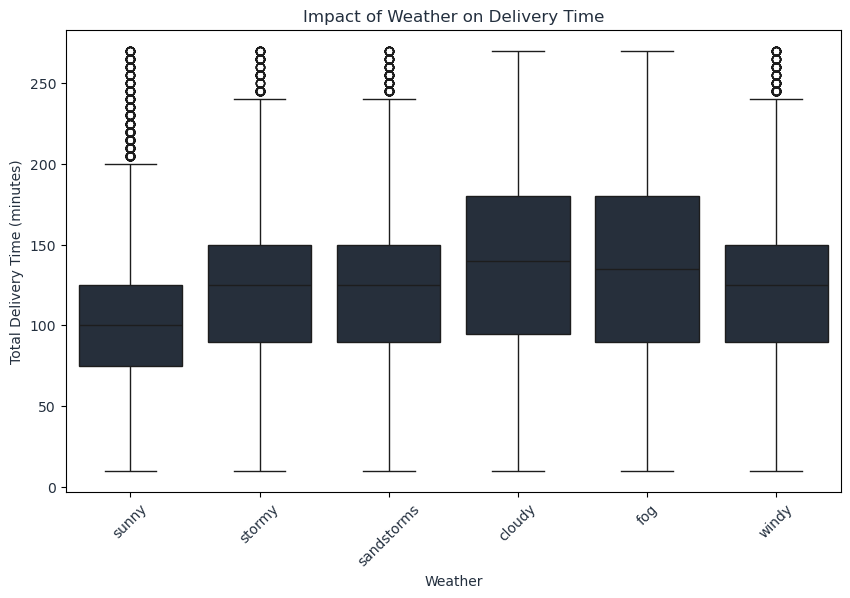

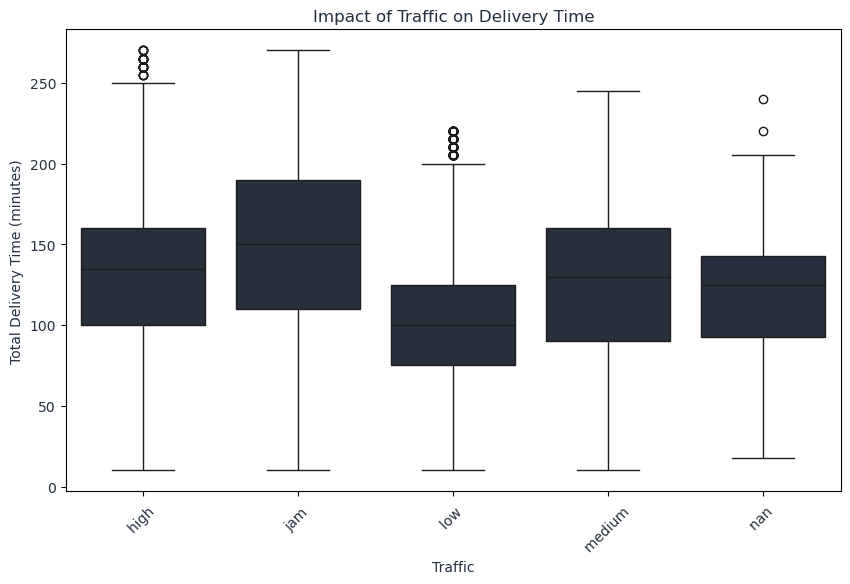

In [35]:
# Box plot for delivery time by weather
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='delivery_time', data=delivery_data, color='#232f3e')
plt.title('Impact of Weather on Delivery Time', color='#232f3e')
plt.xlabel('Weather', color='#232f3e')
plt.ylabel('Total Delivery Time (minutes)', color='#232f3e')
plt.xticks(rotation=45, color='#232f3e')
plt.yticks(color='#232f3e')
plt.show()

# Box plot for delivery time by traffic
plt.figure(figsize=(10, 6))
sns.boxplot(x='traffic', y='delivery_time', data=delivery_data, color='#232f3e')
plt.title('Impact of Traffic on Delivery Time', color='#232f3e')
plt.xlabel('Traffic', color='#232f3e')
plt.ylabel('Total Delivery Time (minutes)', color='#232f3e')
plt.xticks(rotation=45, color='#232f3e')
plt.yticks(color='#232f3e')
plt.show()


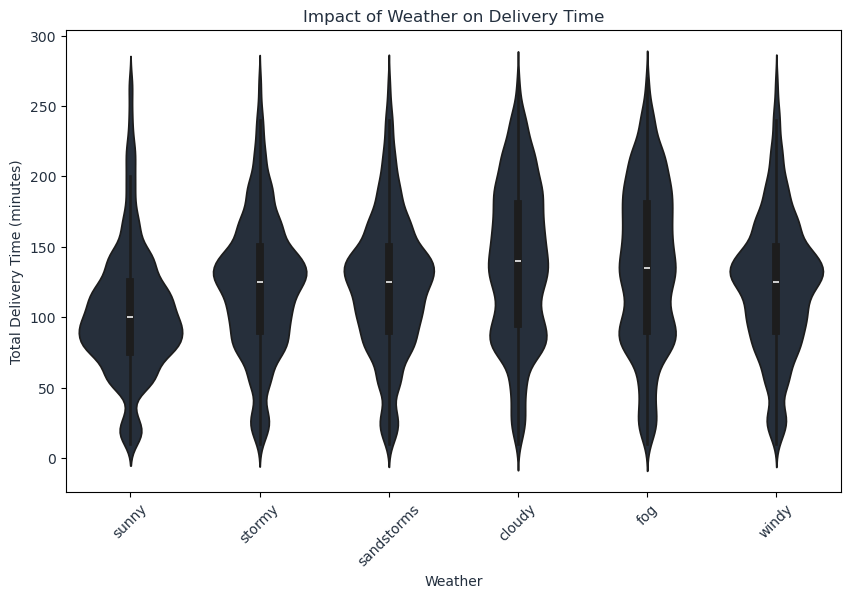

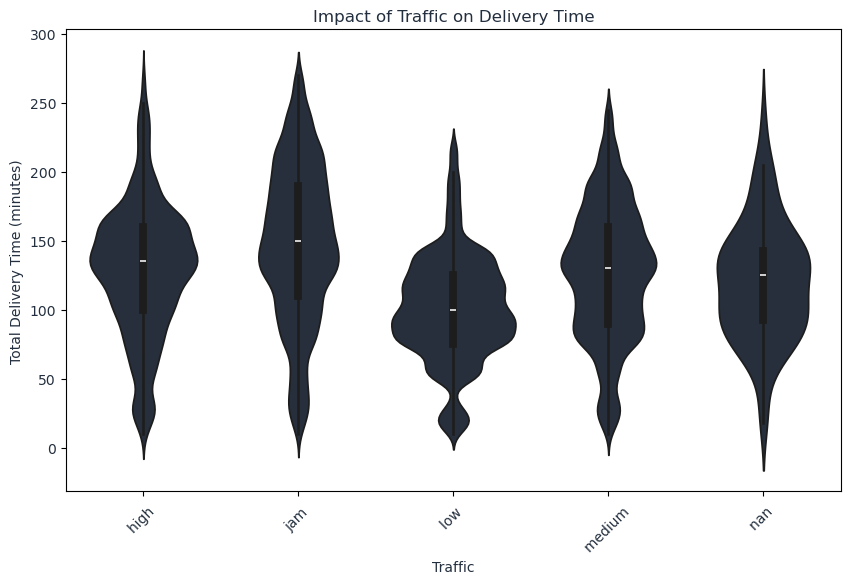

In [36]:
# Violin plot for delivery time by weather
plt.figure(figsize=(10, 6))
sns.violinplot(x='weather', y='delivery_time', data=delivery_data, color='#232f3e')
plt.title('Impact of Weather on Delivery Time', color='#232f3e')
plt.xlabel('Weather', color='#232f3e')
plt.ylabel('Total Delivery Time (minutes)', color='#232f3e')
plt.xticks(rotation=45, color='#232f3e')
plt.yticks(color='#232f3e')
plt.show()

# Violin plot for delivery time by traffic
plt.figure(figsize=(10, 6))
sns.violinplot(x='traffic', y='delivery_time', data=delivery_data, color='#232f3e')
plt.title('Impact of Traffic on Delivery Time', color='#232f3e')
plt.xlabel('Traffic', color='#232f3e')
plt.ylabel('Total Delivery Time (minutes)', color='#232f3e')
plt.xticks(rotation=45, color='#232f3e')
plt.yticks(color='#232f3e')
plt.show()

In [37]:
import scipy.stats as stats

# ANOVA for weather impact
weather_groups = [group['delivery_time'].values for name, group in delivery_data.groupby('weather')]
weather_anova = stats.f_oneway(*weather_groups)
print(f'ANOVA result for weather impact: F-statistic={weather_anova.statistic}, p-value={weather_anova.pvalue}')

# ANOVA for traffic impact
traffic_groups = [group['delivery_time'].values for name, group in delivery_data.groupby('traffic')]
traffic_anova = stats.f_oneway(*traffic_groups)
print(f'ANOVA result for traffic impact: F-statistic={traffic_anova.statistic}, p-value={traffic_anova.pvalue}')


ANOVA result for weather impact: F-statistic=431.5109484919322, p-value=0.0
ANOVA result for traffic impact: F-statistic=1669.5929890606258, p-value=0.0


### Latitude and Longitude Analysis

In [41]:
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import folium

### Using Folium for Interactive Map

In [42]:
# Create a base map
map_center = [delivery_data['store_latitude'].mean(), delivery_data['store_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Add store locations
for idx, row in delivery_data.iterrows():
    folium.Marker([row['store_latitude'], row['store_longitude']], 
                  popup=f"Store Location {idx+1}",
                  icon=folium.Icon(color='blue')).add_to(m)

# Add drop locations
for idx, row in delivery_data.iterrows():
    folium.Marker([row['drop_latitude'], row['drop_longitude']], 
                  popup=f"Drop Location {idx+1}",
                  icon=folium.Icon(color='green')).add_to(m)

# Save the map as an HTML file
# m.save('map.html')
# m

In [44]:
from folium.plugins import HeatMap

# Combine store and drop locations for heatmap
locations = delivery_data[['store_latitude', 'store_longitude']].values.tolist() + delivery_data[['drop_latitude', 'drop_longitude']].values.tolist()

# Create a base map
m_heat = folium.Map(location=map_center, zoom_start=5)

# Add heatmap
HeatMap(locations).add_to(m_heat)

# Save the heatmap as an HTML file
m_heat.save('heatmap.html')
m_heat

## Conclusions and Recommendations

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Amazon Delivery EDA Conclusion</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f7f7f7;
        }
        .container {
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: white;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }
        .header {
            background-color: #232f3e;
            color: white;
            padding: 10px;
            text-align: center;
        }
        .section {
            margin: 20px 0;
        }
        .section h2 {
            background-color: #232f3e;
            color: white;
            padding: 10px;
            margin: 0;
        }
        .section p {
            padding: 10px;
        }
        .highlight {
            background-color: #f0c14b;
            padding: 2px 5px;
        }
        .recommendation {
            border: 1px solid #232f3e;
            padding: 10px;
            background-color: #e7e9ec;
        }
    </style>
</head>
<body>

<div class="container">
    <div class="header">
        <h1>Amazon Delivery EDA Conclusion</h1>
    </div>

<div class="section">
        <h2>1. Data Overview</h2>
        <p>
            The dataset analyzed includes key information on Amazon deliveries, such as agent details, delivery locations, weather conditions, traffic status, vehicle type, and delivery times. The goal of this exploratory data analysis (EDA) was to uncover insights into the factors impacting delivery performance, specifically focusing on delivery time.
        </p>
</div>

<div class="section">
    <h2>2. Descriptive Statistics</h2>
    <p>
        A comprehensive summary of the data revealed the following:
        <ul>
            <li><strong>Agent Age and Rating:</strong> The average agent age was found to be within a specific range, and the ratings provided useful insights into the performance of delivery agents.</li>
            <li><strong>Delivery Time:</strong> Delivery times varied widely, highlighting the need for further analysis to understand the influencing factors.</li>
            <li><strong>Geographical Spread:</strong> The latitude and longitude data provided insights into the geographical spread of delivery and drop locations.</li>
        </ul>
    </p>
</div>

<div class="section">
    <h2>3. Data Preprocessing</h2>
    <p>
        To prepare the data for analysis:
        <ul>
            <li>Missing values were identified and addressed appropriately.</li>
            <li>Categorical data was converted to lowercase for consistency.</li>
            <li>Dates and times were parsed to extract meaningful components such as year, month, day, weekday, order hour, and pickup hour.</li>
            <li>Distances between store and drop locations were calculated using geodesic formulas.</li>
        </ul>
    </p>
</div>

<div class="section">
    <h2>4. Visualization Insights</h2>
    <p>
        A series of visualizations were created to provide a clear understanding of the data:
        <ul>
            <li><strong>Distribution Plots:</strong> Bar plots for categorical variables like weather, traffic, vehicle, and area highlighted the frequency distribution across these categories.</li>
            <li><strong>Pair Plots:</strong> These plots showed relationships between numerical variables, revealing potential correlations.</li>
            <li><strong>Box and Violin Plots:</strong> These provided a detailed view of the impact of weather and traffic conditions on delivery times. Key insights included the fact that adverse weather and high traffic significantly increased delivery times.</li>
            <li><strong>Range Analysis:</strong> A bar plot displayed the range of key numerical variables, excluding the <span class="highlight">distance_km</span> for clarity.</li>
        </ul>
    </p>
</div>

<div class="section">
    <h2>5. Impact of Weather and Traffic</h2>
    <p>
        The analysis demonstrated that:
        <ul>
            <li><strong>Weather Conditions:</strong> Rainy and stormy weather conditions were associated with longer delivery times, as visualized by box and violin plots.</li>
            <li><strong>Traffic Status:</strong> High traffic levels also correlated with increased delivery times, indicating the need for effective route planning and real-time traffic management to optimize delivery performance.</li>
        </ul>
    </p>
</div>

<div class="section">
    <h2>6. Recommendations</h2>
    <div class="recommendation">
        Based on the EDA, the following recommendations are proposed:
        <ul>
            <li><strong>Enhanced Route Planning:</strong> Utilize real-time traffic data and weather forecasts to optimize delivery routes, minimizing delays.</li>
            <li><strong>Agent Training:</strong> Provide training for agents to handle deliveries in adverse conditions efficiently.</li>
            <li><strong>Resource Allocation:</strong> Increase resource allocation during peak traffic times and adverse weather conditions to maintain delivery efficiency.</li>
            <li><strong>Continuous Monitoring:</strong> Implement continuous monitoring and dynamic adjustments to delivery plans based on real-time data.</li>
        </ul>
    </div>
</div>

<div class="section">
    <h2>7. Conclusion</h2>
    <p>
        The EDA of Amazon delivery data has provided valuable insights into the factors affecting delivery times. By understanding the impact of variables such as weather and traffic, Amazon can enhance its delivery operations, ensuring timely deliveries and improving customer satisfaction. The findings underscore the importance of data-driven decision-making in optimizing delivery logistics and highlight areas for future improvement.
    </p>
</div>
<div class="footer">
        <p>&copy; 2024 Fares Abbas Ghazi. All rights reserved.</p>
    </div>
</div>

</div>

</body>
</html>
